In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.integrate

C:\Users\jdavies\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
class Bdots:
    def __init__(self, filename):
        data=np.transpose(np.genfromtxt(open(filename,"rb"),delimiter="\t", skip_footer=1, skip_header=1))
        self.data=data
        self.time_raw=data[0]
        #rogowski signals 1 and 2
        self.bdots_raw=data[1:]
    def truncate(self, threshold=1.0, calibration=None):
        if calibration is None:
            calibration=np.zeros_like(self.bdots_raw)+1.0
        #find the start of the current pulse with a  high threshold
        sig1=self.bdots_raw[0]
        start=np.nonzero(abs(sig1)>threshold)[0][0]
        #back off a bit so we can see the zero signal
        self.start=start-100
        #reverse the array to find the end of the current pulse with a high threshold
        end=np.nonzero(abs(sig1[::-1])>threshold)[0][0]
        #back off a bit so we can see the zero signal
        end=end-100
        self.end=sig1.size-end #find the index in the non-reversed array
        self.time=self.time_raw[self.start:self.end]
        self.bdots_tr=[]
        for br, cal in zip(self.bdots_raw, calibration):
            self.bdots_tr.append(br[self.start:self.end]*cal)
    def add(self):
        self.estat=[]
        for i in np.arange(0,len(self.bdots_tr)-1,2):
            self.estat.append((self.bdots_tr[i]+self.bdots_tr[i+1])/2.0)         
    def subtract(self):
        self.dBdt=[]
        for i in np.arange(0,len(self.bdots_tr)-1,2):
            self.dBdt.append((self.bdots_tr[i]-self.bdots_tr[i+1])/2.0)
    def plot_raw(self):
        self.fig_raw, self.ax_raw=plt.subplots()
        for r in self.bdots_raw:
            self.ax_raw.plot(self.time_raw, r)
    def plot_tr(self):
        self.fig_tr, self.ax_tr=plt.subplots()
        for tr in self.bdots_tr:
            self.ax_tr.plot(self.time, tr)
    def plot_dBdt(self):
        self.fig_dB, self.ax_dB=plt.subplots()
        for dB in self.dBdt:
            self.ax_dB.plot(self.time, dB)
    def plot_estat(self):
        self.fig_dB, self.ax_dB=plt.subplots()
        for es in self.estat:
            self.ax_dB.plot(self.time, es)
    def integrate(self):
        self.B=[scipy.integrate.cumtrapz(b,self.time)/1e9 for b in self.dBdt]
        self.time_B=self.time[:-1]
    def plot_B(self):
        self.fig_B, self.ax_B=plt.subplots()
        for i, b in enumerate(self.B):
            self.ax_B.plot(self.time_B, b, label='Pair '+str(i))
            self.ax_B.legend()


In [5]:
cd "~\Google Drive\MAGPIE\data\2016\s0129_16 RECONNECTION 12 fr + Bdots +Fday cup"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0129_16 RECONNECTION 12 fr + Bdots +Fday cup


In [41]:
cal=np.array([10.8/np.pi,9.7/np.pi, 10/np.pi,9.8/np.pi, 10/0.2, 10/0.2, 4/0.7845,4/0.785])*1e6
bd=Bdots("s0129_16 bdots.dat")
bd.truncate(threshold=1.0,calibration=cal)
bd.add()
bd.subtract()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


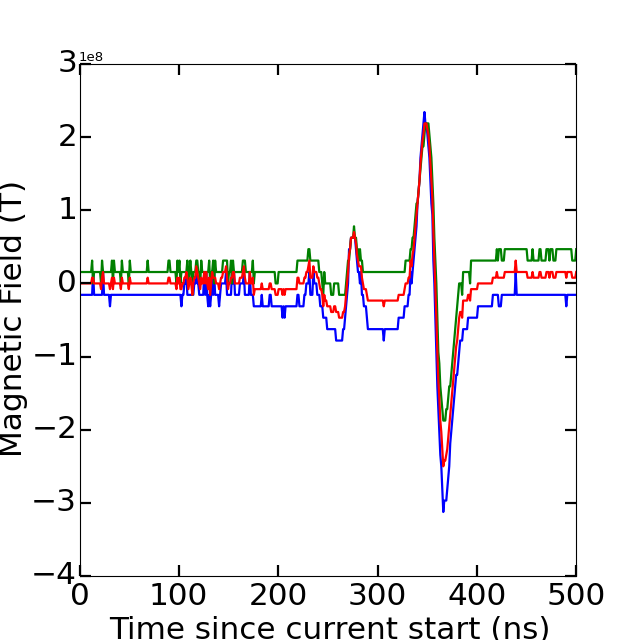

In [45]:
fig, ax=plt.subplots(figsize=(8,8))
ax.plot(bd.time-1530, bd.bdots_tr[4], lw=2)
ax.plot(bd.time-1530, -bd.bdots_tr[5], lw=2)
ax.plot(bd.time-1530, bd.dBdt[2], lw=2)
#ax.plot(bd.time_B-1530, bd.B[1], lw=2,label='Left pair')
ax.set_xlim([0,500])
#ax.set_ylim([-1,8])
ax.set_xlabel('Time since current start (ns)', fontsize=28)
ax.set_ylabel('Magnetic Field (T)', fontsize=28)

ax.tick_params(labelsize=28, pad=5, length=10, width=2)

#ax.legend(fontsize=20)


In [43]:
bd.integrate()

In [113]:
bd.subtract()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


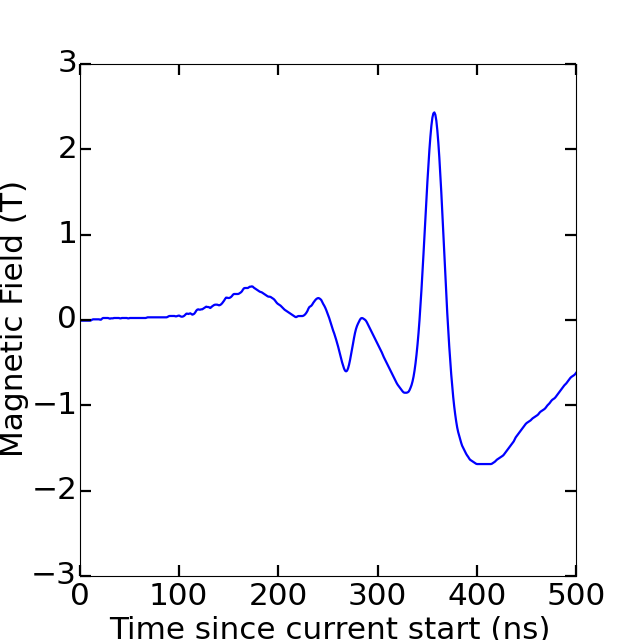

In [44]:
fig, ax=plt.subplots(figsize=(8,8))
ax.plot(bd.time_B-1530, bd.B[2], lw=2)
ax.set_xlim([0,500])
ax.set_ylim([-3,3])
ax.set_xlabel('Time since current start (ns)', fontsize=28)
ax.set_ylabel('Magnetic Field (T)', fontsize=28)

ax.tick_params(labelsize=28, pad=5, length=10, width=2)

#ax.legend(fontsize=20)


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


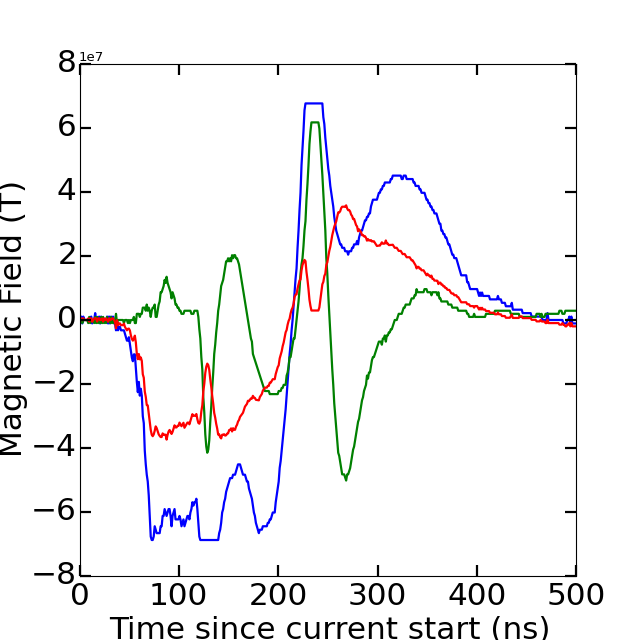

In [208]:
fig, ax=plt.subplots(figsize=(8,8))
ax.plot(bd.time-1530, bd.bdots_tr[0], lw=2)
ax.plot(bd.time-1530, -bd.bdots_tr[1], lw=2)
ax.plot(bd.time-1530, (bd.bdots_tr[0]+bd.bdots_tr[1])/2.0, lw=2)

ax.set_xlim([0,500])
#ax.set_ylim([-1,8])
ax.set_xlabel('Time since current start (ns)', fontsize=28)
ax.set_ylabel('Magnetic Field (T)', fontsize=28)

ax.tick_params(labelsize=28, pad=5, length=10, width=2)

